In [19]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [12]:
iris = datasets.load_iris()
data = pd.DataFrame(iris.data)

In [14]:
data.describe()

,0,1,2,3
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [15]:
data["target"] = iris.target

In [16]:
data

,0,1,2,3,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


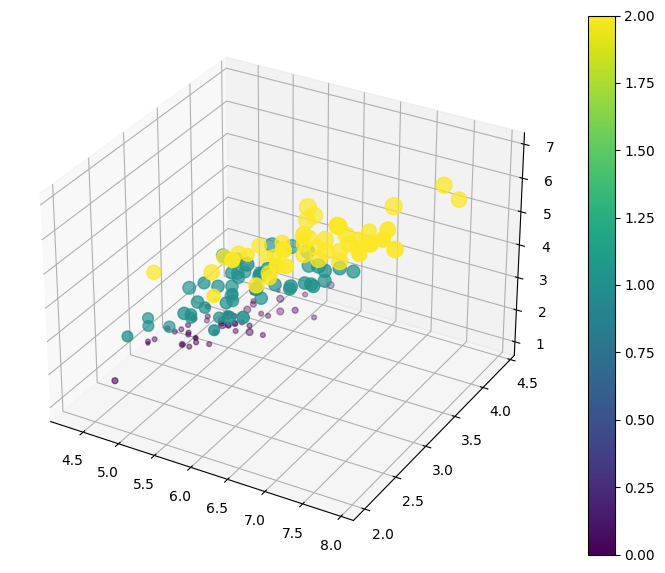

In [80]:
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 7))
ax = plt.axes(projection='3d')

sc = ax.scatter3D(data[data.columns[0]], data[data.columns[1]], data[data.columns[2]], c=data['target'], s=data[data.columns[3]]*60, cmap='viridis')
plt.colorbar(sc)



In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data.drop("target", axis = 1))
X = scaler.transform(data.drop('target', axis=1))
y = data['target']

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [75]:
X_train[:, 1].shape

(120,)

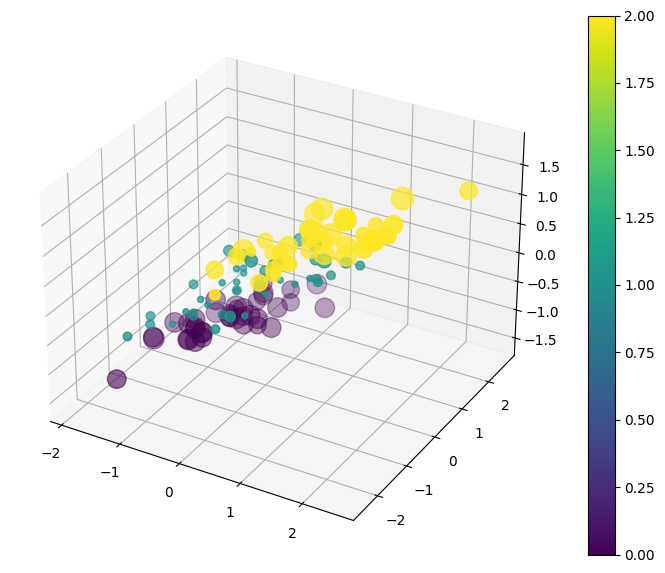

In [76]:
fig1 = plt.figure(figsize=(10, 7))
ax1 = plt.axes(projection='3d')

sc1 = ax1.scatter3D(X_train[:, 0], X_train[:, 1], X_train[:, 2], c=y_train, s=np.abs(X_train[:, 3])*150, cmap='viridis')
plt.colorbar(sc1)

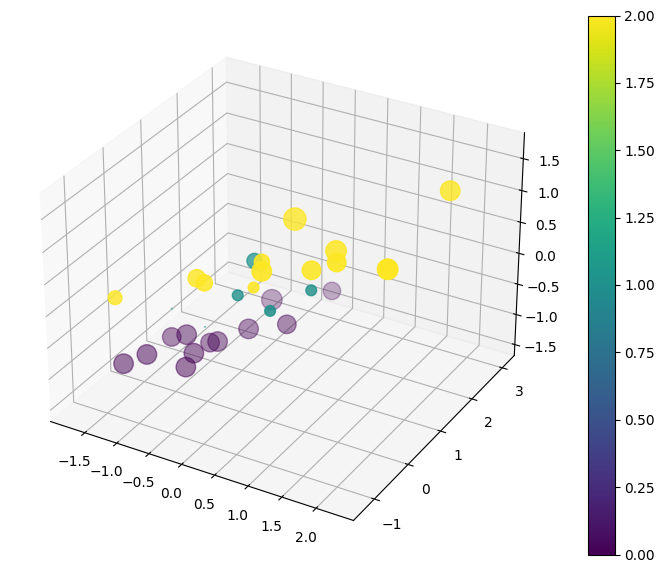

In [77]:
fig1 = plt.figure(figsize=(10, 7))
ax1 = plt.axes(projection='3d')

sc1 = ax1.scatter3D(X_test[:, 0], X_test[:, 1], X_test[:, 2], c=y_test, s=np.abs(X_test[:, 3])*150, cmap='viridis')
plt.colorbar(sc1)

In [50]:
from sklearn.neighbors import KNeighborsClassifier

In [86]:
X_train.shape

(120, 4)

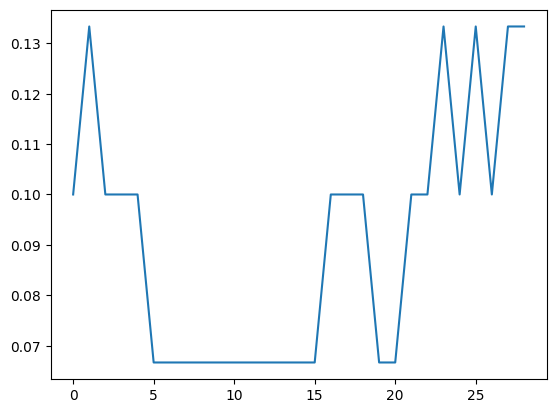

In [88]:
error_rates = []
for i in range(1,30):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train, y_train)
  pred_i = knn.predict(X_test)
  error_rates.append(np.mean(pred_i != y_test))

plt.plot(error_rates)

In [100]:
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)

print(pred == y_test)

102     True
78      True
32      True
48      True
54      True
100     True
6       True
121     True
103     True
86      True
70      True
112     True
133    False
15      True
135     True
90      True
106    False
18      True
38      True
120     True
35      True
132     True
49      True
0       True
11      True
40      True
3       True
82      True
117     True
101     True
Name: target, dtype: bool


In [101]:
from sklearn.metrics import classification_report, confusion_matrix

In [102]:
print(confusion_matrix(y_test, pred))

[[12  0  0]
 [ 0  6  0]
 [ 0  2 10]]


In [103]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.75      1.00      0.86         6
           2       1.00      0.83      0.91        12

    accuracy                           0.93        30
   macro avg       0.92      0.94      0.92        30
weighted avg       0.95      0.93      0.94        30

